# 가우시안 나이브베이즈 아이리스 분류

In [1]:
# 시각화를 위해 pandas를 임포트합니다
import pandas as pd
# iris 데이터는 sklearn에서 직접 로드할 수 있습니다
from sklearn.datasets import load_iris
# sklearn의 train_test_split을 사용하면 라인 한줄로 손쉽게 데이터를 나눌 수 있습니다
from sklearn.model_selection import train_test_split
# Gaussian Naive Bayes로 iris 데이터를 분류하도록 하겠습니다
from sklearn.naive_bayes import GaussianNB
# 분류 성능을 측정하기 위해 metrics와 accuracy_score를 임포트합니다
from sklearn import metrics
from sklearn.metrics import accuracy_score

### IRIS 데이터 시각화

In [2]:

# iris 데이터를 불러옵니다
dataset = load_iris()
# pandas의 데이터프레임으로 데이터를 저장합니다
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# 분류값을 데이터프레임에 저장합니다
df['target'] = dataset.target
# 숫자인 분류값을 이해를 돕기위해 문자로 변경합니다
df.target = df.target.map({0:"setosa", 1:"versicolor", 2:"virginica"})
# 데이터를 확인해봅니다
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.target.value_counts()

virginica     50
setosa        50
versicolor    50
Name: target, dtype: int64

### iris 데이터의 분포도 확인

In [4]:
# 분류값 별로 데이터프레임을 나눕니다
setosa_df = df[df.target == "setosa"]
versicolor_df = df[df.target == "versicolor"]
virginica_df = df[df.target == "virginica"]

sepal length(cm) : 꽃받침 길이

In [5]:
ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde', 
                                    ax=ax, 
                                    secondary_y=True, 
                                    title="setosa sepal length", 
                                    figsize = (8,4))

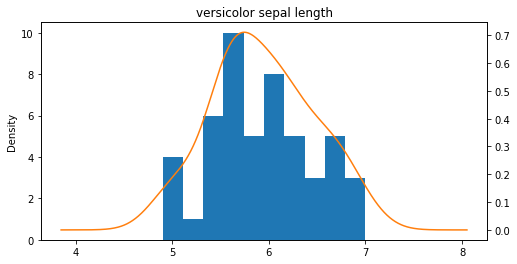

In [7]:
# iris 데이터의 분포도가 정규분포(Gaussian Distribution)과 유사
ax = versicolor_df['sepal length (cm)'].plot(kind='hist')
versicolor_df['sepal length (cm)'].plot(kind='kde', 
                                        ax=ax, 
                                        secondary_y=True, 
                                        title="versicolor sepal length", 
                                        figsize = (8,4))

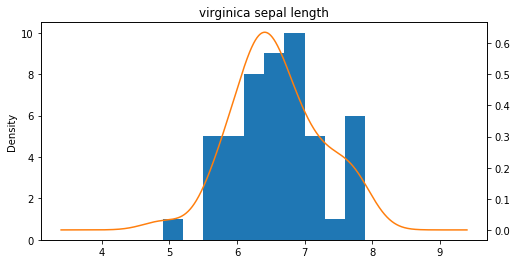

In [8]:
ax = virginica_df['sepal length (cm)'].plot(kind='hist')
virginica_df['sepal length (cm)'].plot(kind='kde', 
                                       ax=ax, 
                                       secondary_y=True, 
                                       title="virginica sepal length", 
                                       figsize = (8,4))

sepal width(cm)

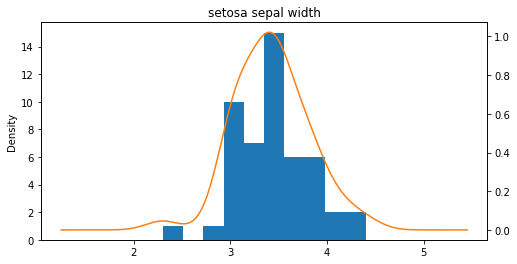

In [9]:
ax = setosa_df['sepal width (cm)'].plot(kind='hist')
setosa_df['sepal width (cm)'].plot(kind='kde', 
                                   ax=ax, 
                                   secondary_y=True, 
                                   title="setosa sepal width", 
                                   figsize = (8,4))

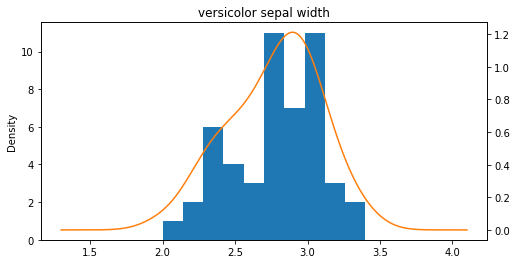

In [10]:
ax = versicolor_df['sepal width (cm)'].plot(kind='hist')
versicolor_df['sepal width (cm)'].plot(kind='kde', 
                                       ax=ax, 
                                       secondary_y=True, 
                                       title="versicolor sepal width", 
                                       figsize = (8,4))

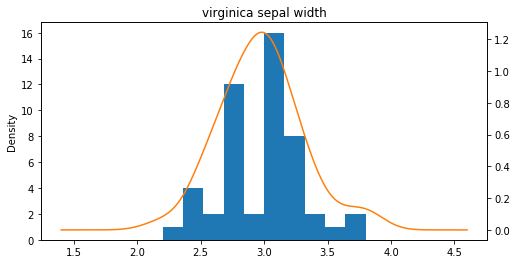

In [11]:
ax = virginica_df['sepal width (cm)'].plot(kind='hist')
virginica_df['sepal width (cm)'].plot(kind='kde', 
                                      ax=ax, 
                                      secondary_y=True, 
                                      title="virginica sepal width", 
                                      figsize = (8,4))

petal length(cm)

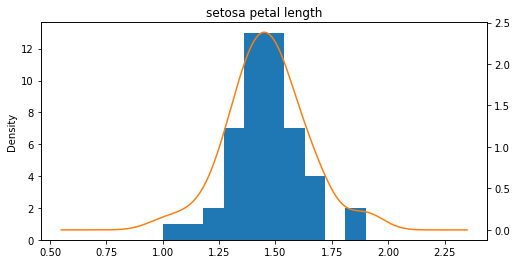

In [12]:
ax = setosa_df['petal length (cm)'].plot(kind='hist')
setosa_df['petal length (cm)'].plot(kind='kde', 
                                    ax=ax, 
                                    secondary_y=True, 
                                    title="setosa petal length", 
                                    figsize = (8,4))

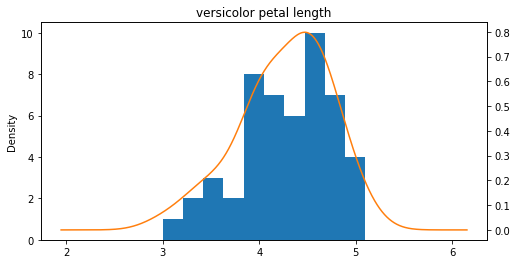

In [13]:
ax = versicolor_df['petal length (cm)'].plot(kind='hist')
versicolor_df['petal length (cm)'].plot(kind='kde', 
                                        ax=ax, 
                                        secondary_y=True, 
                                        title="versicolor petal length", 
                                        figsize = (8,4))

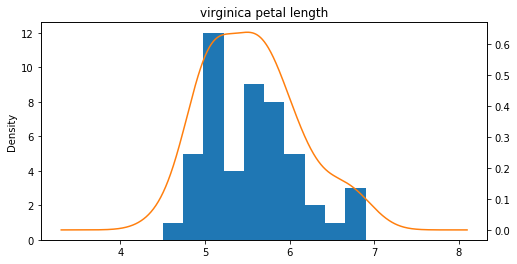

In [14]:
ax = virginica_df['petal length (cm)'].plot(kind='hist')
virginica_df['petal length (cm)'].plot(kind='kde', 
                                       ax=ax, 
                                       secondary_y=True, 
                                       title="virginica petal length", 
                                       figsize = (8,4))

petal width(cm)

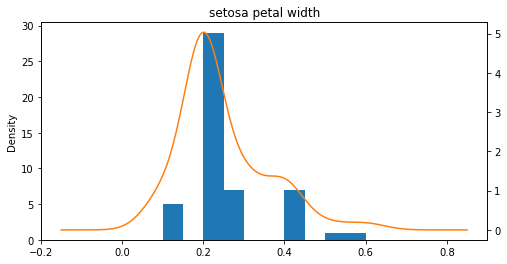

In [15]:
ax = setosa_df['petal width (cm)'].plot(kind='hist')
setosa_df['petal width (cm)'].plot(kind='kde', 
                                   ax=ax, 
                                   secondary_y=True, 
                                   title="setosa petal width", 
                                   figsize = (8,4))

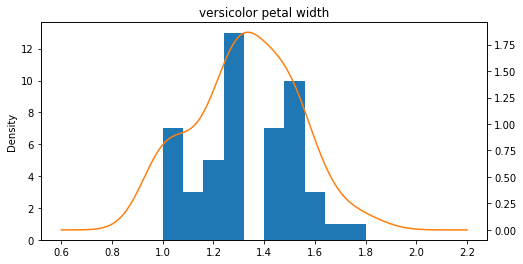

In [16]:
ax = versicolor_df['petal width (cm)'].plot(kind='hist')
versicolor_df['petal width (cm)'].plot(kind='kde', 
                                       ax=ax, 
                                       secondary_y=True, 
                                       title="versicolor petal width", 
                                       figsize = (8,4))

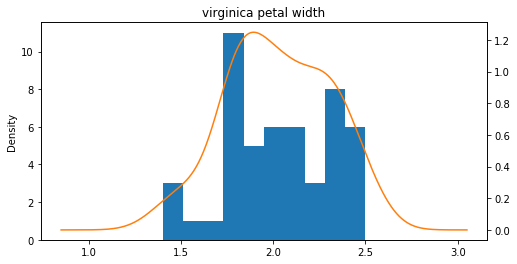

In [17]:
ax = virginica_df['petal width (cm)'].plot(kind='hist')
virginica_df['petal width (cm)'].plot(kind='kde', 
                                      ax=ax, 
                                      secondary_y=True, 
                                      title="virginica petal width", 
                                      figsize = (8,4))

### 데이터를 학습 데이터와 테스트 데이터로 나누기

In [48]:
# 20%를 테스트 데이터로 분류합니다
X_train,X_test,y_train,y_test=train_test_split(dataset.data,dataset.target,test_size=0.2)

### Gaussian Naive Bayes 분류하기

In [49]:
# 학습데이터로 모델을 학습합니다
model = GaussianNB()
model.fit(X_train, y_train)

# 테스트 데이터로 모델을 테스트합니다
expected = y_test
predicted = model.predict(X_test)

In [50]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      1.00      0.95         9
           2       1.00      0.90      0.95        10

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [51]:
accuracy_score(y_test, predicted)

0.9666666666666667

In [52]:
# Confusion Matrix
print(metrics.confusion_matrix(expected, predicted))

[[11  0  0]
 [ 0  9  0]
 [ 0  1  9]]


# 다항분포 나이브베이즈 영화리뷰 감정분류

In [23]:

import numpy as np
import pandas as pd

# 다항분포 나이브베이즈를 위한 라이브러리를 임포트합니다
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# 모델의 정확도 평가를 위해 임포트합니다
from sklearn.metrics import accuracy_score

In [24]:
# 간단한 영화리뷰 분류 실습을 위해 아래 영화리뷰와 함께 영화에 대한 평가(긍정적/부정적) 정보가 있는 데이터를 사용

review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]
df = pd.DataFrame(review_list)
df

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


In [25]:
# sklearn의 다항분포 나이브베이즈 모델은 숫자만을 다루므로 type에 해당하는 데이터를 숫자로 매핑
df['label'] = df['type'].map({"positive":1,"negative":0})
df

,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever,positive,1
5,shame I wasted money and time,negative,0
6,regret on this move. I will never never what m...,negative,0
7,I do not like this movie,negative,0
8,I do not like actors in this movie,negative,0
9,boring boring sleeping movie,negative,0


In [26]:
# 학습을 위해, 학습에 사용될 특징값과 분류값을 분리
df_x=df["movie_review"]
df_y=df["label"]

다항분포 나이브베이즈의 입력 데이터는 고정된 크기의 벡터로써, 각각의 인덱스는 단어의 빈도수로 구분된 데이터이여야 합니다.   
sklearn의 CountVectorizer를 사용하여 쉽게 구현할 수 있습니다.   
CountVectorizer는 입력된 데이터(10개의 영화 리뷰)에 출현된 모든 단어의 갯수만큼의 크기의 벡터를 만든 후,   
각각의 리뷰를 그 고정된 벡터로 표현합니다.

In [27]:

cv = CountVectorizer()
x_traincv=cv.fit_transform(df_x)
encoded_input=x_traincv.toarray()

In [28]:
"""
아래의 행렬에서 볼 수 있듯, 데이터에서 총 37개의 단어가 발견되어, 각각의 영화 리뷰가 37개의 크기를 갖는 벡터로 표현되었습니다.
또한 다항분포 나이브베이즈에 사용하기 위해 단어의 빈도수만큼의 수치로 각 단어의 인덱스에 수치가 할당되었습니다.
this is great great movie. I will watch again:
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0]
"""
encoded_input

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

In [29]:
# 벡터로 인코딩된 이메일 제목에 어떤 단어들이 포함되어 있는 지 알고 싶을 경우
cv.inverse_transform(encoded_input[0])

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9')]

In [30]:
# 벡터의 37개의 인덱스가 각각 무슨 단어를 의미하는 지 알고싶을 경우
cv.get_feature_names()

['actors',
 'again',
 'also',
 'amazing',
 'and',
 'awesome',
 'boring',
 'boyfriend',
 'cool',
 'director',
 'do',
 'ever',
 'from',
 'great',
 'in',
 'is',
 'like',
 'money',
 'move',
 'movie',
 'my',
 'never',
 'not',
 'of',
 'on',
 'regret',
 'said',
 'shame',
 'sleeping',
 'the',
 'this',
 'time',
 'wasted',
 'watch',
 'what',
 'will',
 'year']

### 다항 분포 나이브베이즈 분류
다항분포 나이브베이즈로 영화 리뷰를 긍정적 평가인지, 부정적 평가인지 분류해보도록 하겠습니다.   
MultinomialNB는 기본적으로 스무딩을 지원하므로, 학습데이터에 없는 단어가 테스트에 출현해도 분류를 이상없이 진행합니다.

In [31]:
# 기존의 데이터로 학습을 진행합니다
mnb = MultinomialNB()
y_train=df_y.astype('int')
mnb.fit(x_traincv,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]
test_df = pd.DataFrame(test_feedback_list)
test_df['label'] = test_df['type'].map({"positive":1,"negative":0})
test_x=test_df["movie_review"]
test_y=test_df["label"]

In [33]:
# 테스트를 진행합니다
x_testcv=cv.transform(test_x)
predictions=mnb.predict(x_testcv)

In [34]:
accuracy_score(test_y, predictions)

1.0

# 베르누이 나이브베이즈 스팸필터

In [35]:
import numpy as np
import pandas as pd

# 베르누이 나이브베이즈를 위한 라이브러리를 임포트합니다
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

# 모델의 정확도 평가를 위해 임포트합니다
from sklearn.metrics import accuracy_score

In [36]:
# 데이터 수집
# 이메일 타이틀과 스팸 여부가 있는 데이터를 사용

email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]
df = pd.DataFrame(email_list)

In [37]:
df

,email title,spam
0,free game only today,True
1,cheapest flight deal,True
2,limited time offer only today only today,True
3,today meeting schedule,False
4,your flight schedule attached,False
5,your credit card statement,False


In [38]:
# 데이터 다듬기
# sklearn의 베르누이 나이브베이즈 분류기(BernoulliNB)는 숫자만을 다루기 때문에,   
# True와 False를 1과 0으로 치환

df['label'] = df['spam'].map({True:1,False:0})
df

,email title,spam,label
0,free game only today,True,1
1,cheapest flight deal,True,1
2,limited time offer only today only today,True,1
3,today meeting schedule,False,0
4,your flight schedule attached,False,0
5,your credit card statement,False,0


In [39]:
# 학습에 사용될 데이터와 분류값을 나눕니다
df_x=df["email title"]
df_y=df["label"]

베르누이 나이브베이즈의 입력 데이터는 고정된 크기의 벡터로써, 0과 1로 구분된 데이터이여야 합니다.   
sklearn의 CountVectorizer를 사용하여 쉽게 구현할 수 있습니다.   
CountVectorizer는 입력된 데이터(6개의 이메일)에 출현된 모든 단어의 갯수만큼의 크기의 벡터를 만든 후,   
각각의 이메일을 그 고정된 벡터로 표현합니다.    
binary=True를 파라미터를 넘겨줌으로써, 각각의 이메일마다 단어가 한번 이상 출현하면 1, 출현하지 않을 경우 0으로 표시하게 합니다.

In [40]:
cv = CountVectorizer(binary=True)
x_traincv=cv.fit_transform(df_x)

아래의 행렬에서 볼 수 있듯, 데이터에서 총 17개의 단어가 발견되어, 각각의 이메일이 17개의 크기를 갖는 벡터로 표현되었습니다.   
또한 베르누이 나이브베이즈에 사용하기 위해 중복된 단어가 이메일 제목에 있더라도, 1로 표현된 것을 확인할 수 있습니다.   
limited time offer only today only today: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0]   

In [41]:
encoded_input=x_traincv.toarray()
encoded_input

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]], dtype=int64)

In [42]:
# 벡터로 인코딩된 이메일 제목에 어떤 단어들이 포함되어 있는 지 알고 싶을 경우
cv.inverse_transform(encoded_input[0])

[array(['free', 'game', 'only', 'today'], dtype='<U9')]

In [43]:
# 벡터의 17개의 인덱스가 각각 무슨 단어를 의미하는 지 알고싶을 경우
cv.get_feature_names()

['attached',
 'card',
 'cheapest',
 'credit',
 'deal',
 'flight',
 'free',
 'game',
 'limited',
 'meeting',
 'offer',
 'only',
 'schedule',
 'statement',
 'time',
 'today',
 'your']

### 베르누이 나이브베이즈 분류
베르누이 나이브베이즈로 스팸 메일을 분류해보도록 하겠습니다.   
BernoulliNB는 기본적으로 스무딩을 지원하므로, 학습데이터에 없는 단어가 테스트에 출현해도 분류를 이상없이 진행합니다.

In [44]:
# 학습 데이터로 베르누이 분류기를 학습합니다
bnb = BernoulliNB()
y_train=df_y.astype('int')
bnb.fit(x_traincv,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [45]:
# 테스트 데이터 다듬기
test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]
test_df = pd.DataFrame(test_email_list)
test_df['label'] = test_df['spam'].map({True:1,False:0})
test_x=test_df["email title"]
test_y=test_df["label"]
x_testcv=cv.transform(test_x)

In [46]:
predictions=bnb.predict(x_testcv)

In [47]:
accuracy_score(test_y, predictions)

0.8333333333333334